In [9]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import constants 



In [10]:
# import sys
# sys.path.append('/home/pkruyt/cernbox/CERN-coolers/LEIR/ions')

# from ion_properties import ions, IonProperties

In [11]:
# context = xo.ContextCpu(omp_num_threads=4)
context = xo.ContextCpu()

line = xt.Line.from_json('sps.json')
particle_ref0=line.particle_ref
line.build_tracker()

clight=constants.speed_of_light
circumference = line.get_length()

Loading line from dict: 100%|██████████| 38786/38786 [00:02<00:00, 18709.52it/s]


Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [12]:
from ion_properties import lead,calcium,xenon,xenon2nd


lead 

In [16]:
for ion_loop in tqdm([lead]):
    line.discard_tracker()
    q0 = ion_loop.q0
    mass0 = ion_loop.mass0
    gamma0 = ion_loop.gamma_rel
    beta0 = ion_loop.beta_rel
    # gamma = particle_ref.gamma0
    # beta= particle_ref.beta0
    p0c = mass0*gamma0*beta0 #eV/c
    bunch_intensity = ion_loop.Intensity
    particle_ref = xp.Particles(p0c = p0c, mass0 = mass0, q0 = q0, gamma0 = gamma0)

    line.particle_ref=particle_ref
    line.build_tracker()
    twiss = line.twiss()
    injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
    injection_dp_p = 2e-4
    sigma_z = 0.063 #https://cds.cern.ch/record/2690736/files/SPSC-I-253.pdf
    geom_epsx = injection_nemitt/(beta0*gamma0)
    
    bm_growth_rates = twiss.get_ibs_growth_rates(
    formalism="bjorken-mtingwa", 
    total_beam_intensity=bunch_intensity,
    nemitt_x=injection_nemitt,
    nemitt_y=injection_nemitt,
    sigma_delta=injection_dp_p,
    bunch_length=sigma_z,
    bunched=True,
    )


    print(bm_growth_rates)
    print('bunch intensity:',bunch_intensity)
    

  0%|          | 0/1 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


100%|██████████| 1/1 [00:16<00:00, 16.16s/it]

IBSGrowthRates(Tx=0.000804, Ty=-1.63e-05, Tz=0.00291)
bunch intensity: 90000000


In [14]:



injection_nemitt = 1.5*1e-6 # m*rad (normalized emittance)
injection_dp_p = 2e-4
sigma_z = 0.063 #https://cds.cern.ch/record/2690736/files/SPSC-I-253.pdf
    






elias case for SPS to benchmark

In [18]:
for ion_loop in tqdm([lead]):
    line.discard_tracker()
    q0 = ion_loop.q0
    mass0 = ion_loop.mass0
    gamma0 = ion_loop.gamma_rel
    beta0 = ion_loop.beta_rel
    # gamma = particle_ref.gamma0
    # beta= particle_ref.beta0
    p0c = mass0*gamma0*beta0 #eV/c
    bunch_intensity = ion_loop.Intensity
    particle_ref = xp.Particles(p0c=p0c, mass0=mass0, q0=q0,gamma0 = gamma0)

    line.particle_ref=particle_ref
    line.build_tracker()
    twiss = line.twiss()
    twiss.gamma0=gamma0
    twiss.beta0=beta0
    injection_nemitt_x = 0.5*1e-6 # m*rad (normalized emittance)
    injection_nemitt_y = 0.5*1e-6 # m*rad (normalized emittance)

    injection_dp_p = 2e-4
    sigma_z = 0.063 #https://cds.cern.ch/record/2690736/files/SPSC-I-253.pdf
        
    bm_growth_rates = twiss.get_ibs_growth_rates(
    formalism="bjorken-mtingwa", 
    total_beam_intensity=bunch_intensity,
    nemitt_x=injection_nemitt,
    nemitt_y=injection_nemitt,
    sigma_delta=injection_dp_p,
    bunch_length=sigma_z,
    bunched=True,
    )

    print('gamma:',gamma0)

    print(bm_growth_rates)
    print('bunch intensity:',bunch_intensity)
    

  0%|          | 0/1 [00:00<?, ?it/s]

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


100%|██████████| 1/1 [00:16<00:00, 16.06s/it]

gamma: 96.08823512129919
0.0008044422668178754
bunch intensity: 90000000


Loop over both sig_delta and emittance

In [ ]:
sig_delta_list = np.linspace(2e-5, 2.2e-4, 50)
n_emitt_list=np.linspace(1e-7,1.7e-6,50)

# sig_delta_list = np.linspace(0.4e-4, 1e-4, 10)
# n_emitt_list=np.linspace(0.5e-6,1.5e-6,10)
sigma_z = 0.063 #https://cds.cern.ch/record/2690736/files/SPSC-I-253.pdf

growth_rates_2d_x = np.zeros((len(sig_delta_list), len(n_emitt_list)))
growth_rates_2d_y = np.zeros((len(sig_delta_list), len(n_emitt_list)))
growth_rates_2d_z = np.zeros((len(sig_delta_list), len(n_emitt_list)))

for ion_loop in [xenon]:
    line.discard_tracker()
    q0 = ion_loop.q0
    mass0 = ion_loop.mass0
    gamma0 = ion_loop.gamma_rel
    beta0 = ion_loop.beta_rel
    # gamma = particle_ref.gamma0
    # beta= particle_ref.beta0
    p0c = mass0*gamma0*beta0 #eV/c
    bunch_intensity = ion_loop.Intensity
    particle_ref = xp.Particles(p0c=p0c, mass0=mass0, q0=q0,gamma0 = gamma0)

    line.particle_ref=particle_ref
    line.build_tracker()
    twiss = line.twiss()
    
    for j, n_emitt_loop in tqdm(enumerate(n_emitt_list)):
        geom_epsx = n_emitt_loop/(beta0*gamma0)
        geom_epsy = n_emitt_loop/(beta0*gamma0)
        
        for k, sig_delta_loop in enumerate(sig_delta_list):
           
           bm_growth_rates = twiss.get_ibs_growth_rates(
            formalism="bjorken-mtingwa", 
            total_beam_intensity=bunch_intensity,
            nemitt_x=injection_nemitt,
            nemitt_y=injection_nemitt,
            sigma_delta=injection_dp_p,
            bunch_length=sigma_z,
            bunched=True,
            )


           growth_rates_2d_x[k, j] = bm_growth_rates.Tx
           growth_rates_2d_y[k, j] = bm_growth_rates.Ty
           growth_rates_2d_z[k, j] = bm_growth_rates.Tz

    np.savez(f'results/IBS_bunched/{ion_loop.name}.npz',
            growth_rates_2d_x=growth_rates_2d_x,
            growth_rates_2d_y=growth_rates_2d_y,
            growth_rates_2d_z=growth_rates_2d_z,
            sig_delta_list=sig_delta_list,
            n_emitt_list=n_emitt_list,
            total_intensity=bunch_intensity)

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


0it [00:00, ?it/s]Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with the results from MAD-X itself.
  warnings.warn(
Twiss was not calculated at center of elements
/home/pkruyt/miniforge3/envs/xsuite-laser/lib/python3.11/site-packages/xibs/analytical.py:1158: UserWarning: The provided Twiss was calculated at the exit of the elements, but a centered version is desired. You might notice some discrepancies with t

Example of Growth rates as a function of RMS dp/p

In [19]:
sig_delta_list = np.linspace(1e-4, 1e-5, 50)

growth_rates_2d_x = np.zeros((len(sig_delta_list), 1))
growth_rates_2d_y = np.zeros((len(sig_delta_list), 1))
growth_rates_2d_z = np.zeros((len(sig_delta_list), 1))

ion_example=xenon

line.discard_tracker()
q0 = ion_example.q0
mass0 = ion_example.mass0
beta0 = ion_example.beta_rel
gamma0 = ion_example.gamma_rel
# gamma = particle_ref.gamma0
# beta= particle_ref.beta0
p0c = mass0*gamma0*beta0 #eV/c
bunch_intensity = ion_example.Intensity
particle_ref = xp.Particles(p0c=p0c, mass0=mass0, q0=q0)

line.particle_ref=particle_ref
line.build_tracker()
twiss = line.twiss()

geom_epsx = 1.5e-6/(beta0*gamma0)
geom_epsy = 1.5e-6/(beta0*gamma0)

for k, sig_delta_loop in enumerate(sig_delta_list):

    bm_growth_rates = twiss.get_ibs_growth_rates(
            formalism="bjorken-mtingwa", 
            total_beam_intensity=bunch_intensity,
            nemitt_x=injection_nemitt,
            nemitt_y=injection_nemitt,
            sigma_delta=injection_dp_p,
            bunch_length=sigma_z,
            bunched=True,
            )

    growth_rates_2d_x[k, 0] = bm_growth_rates.Tx
    growth_rates_2d_y[k, 0] = bm_growth_rates.Ty
    growth_rates_2d_z[k, 0] = bm_growth_rates.Tz

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [ ]:
twiss.gamma0

152.5162392853479

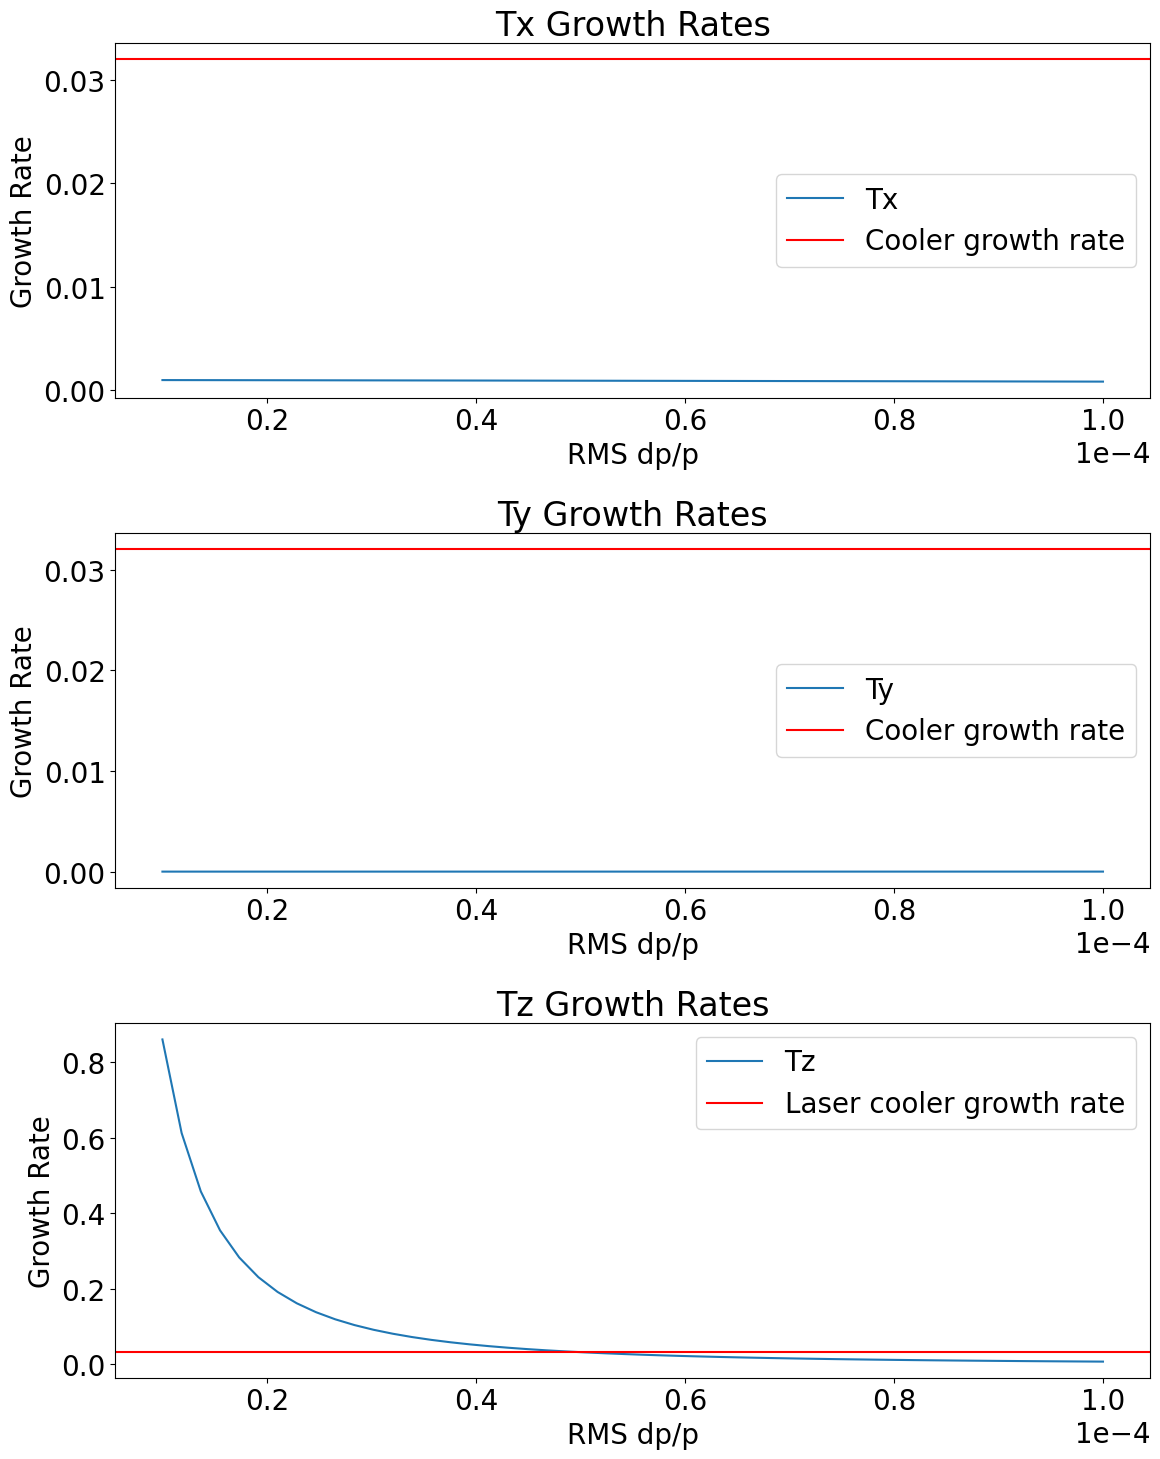

In [ ]:
growth_rates_list=[-0.014543483928087665, -0.03199828107563238, -0.2150191845385947]

growth_rate_xenon=-0.03199828107563238


plt.figure(figsize=(12, 15))
plt.rcParams.update({'font.size': 20})


plt.subplot(3, 1, 1)
plt.plot(sig_delta_list, growth_rates_2d_x[:, 0], label='Tx')
plt.title('Tx Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Cooler growth rate')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(sig_delta_list, growth_rates_2d_y[:, 0], label='Ty')
plt.title('Ty Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Cooler growth rate')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(sig_delta_list, growth_rates_2d_z[:, 0], label='Tz')
plt.title('Tz Growth Rates')
plt.xlabel('RMS dp/p')
plt.ylabel('Growth Rate')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
plt.axhline(-growth_rate_xenon,color='red',label='Laser cooler growth rate')
plt.legend()

plt.tight_layout()
plt.show()